<a href="https://colab.research.google.com/github/sakshipatel2702/Machine_Learning/blob/main/Assign03_Sakshi_N01551583.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment02_Sakshi_N01551583**

## Step - 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assign03

/content/drive/MyDrive/Assign03


## Step-2

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
X = data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
type(X)

numpy.ndarray

## Step-3

### Use dendrogram method to find the optimal number of clusters

In [ ]:
import scipy
from scipy.cluster import hierarchy as h

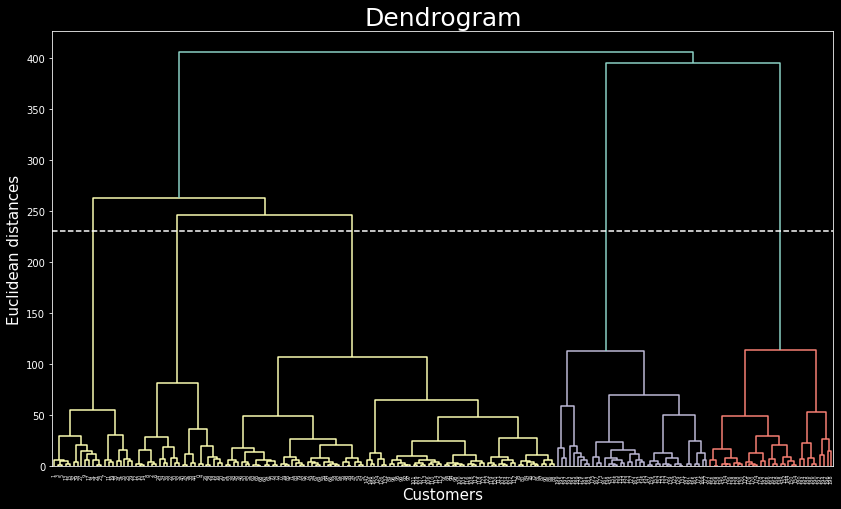

In [ ]:
plt.figure(figsize = (14,8))
dendrogram = h.dendrogram(h.linkage(X, method = 'ward'))  
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.axhline(230, linestyle='--') #that -- line in the diagram shows that we got the highest line which intersects 5 points hence we can make 5 clusters
plt.show()

### Applying Hierarchical Clustering to train the model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)

### Visualize the clusters

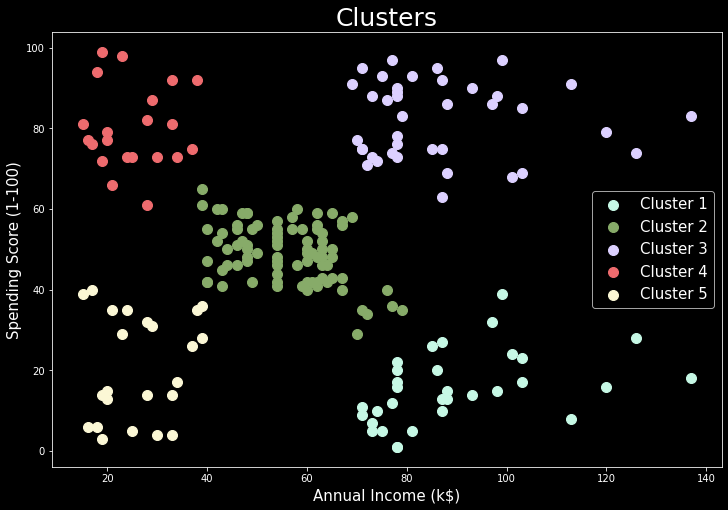

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = '#c6f8e5', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = '#87ab69', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = '#dcd0ff', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = '#ee6b6e', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = '#fbf7d5', label = 'Cluster 5')

plt.title('Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Step - 4 & 5

So using Hierarchical clustering algorithm on Mall_Customers Data we can see that customers in Cluster 1 are our target audience as they are the people who have more annual income but spend less. Cluster 2 shows customers who earn medium salary and spend average, Cluster 3 shows group of people whose annual income is more but spends more too, people in Cluster 4 earns less and spends more while customers in Cluster 5 earns less and spends less.


## Step - 6

### Evaluating Hierarchical Clustering performance by Silhouette Score

**Silhouette Score for 5 Clusters**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(f'Silhouette Score(n = 5) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 5) : 0.5529945955148897


**Silhouette Score for 2 Clusters**

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 2) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 2) : 0.36706444723912895


**Silhouette Score for 8 Clusters**

In [ ]:
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 4) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 4) : 0.4326286245782246


### Evaluating Hierarchical Clustering performance by Calinski-Harabasz ( CH ) Index

In [ ]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

251.32552800907388

## Step - 7 

### Compare Hierarchical clustering with K-means clustering based on your results.

Below attached is an visualization of Clusters that we got using K-Means Algorithm and Hierarchical Algoritm. And we can see that both methods gave us an answer of n=5 that means both of the methods using Dendogram and Elbow method gave us an answer of using 5 clusters for our Mall_Customers data. In K-Means we can find clusters for data with different sizes and shapes while if we use Hierarchical clustering we need to make sure that the data on which we are performing is not much long. In K-Means convergence is guranteed while not in Hierarchical Algo.

Visualization of Clusters using K-Means and Elbow Methods:
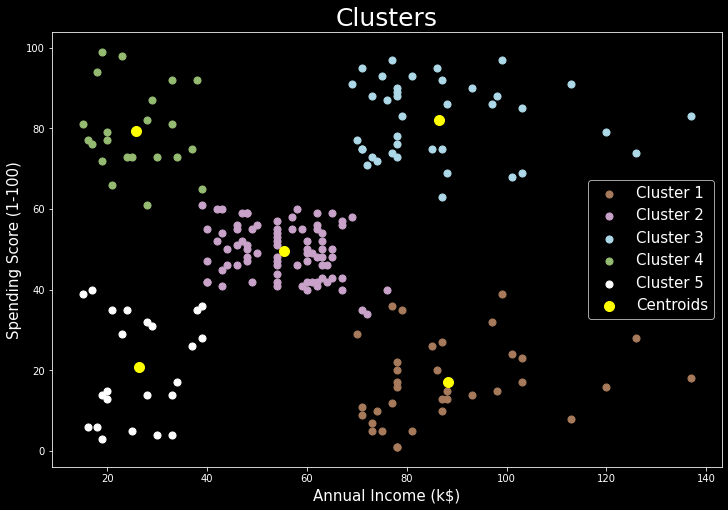

Visualization of Clusters using Hierarchical clustering and Dendogram:
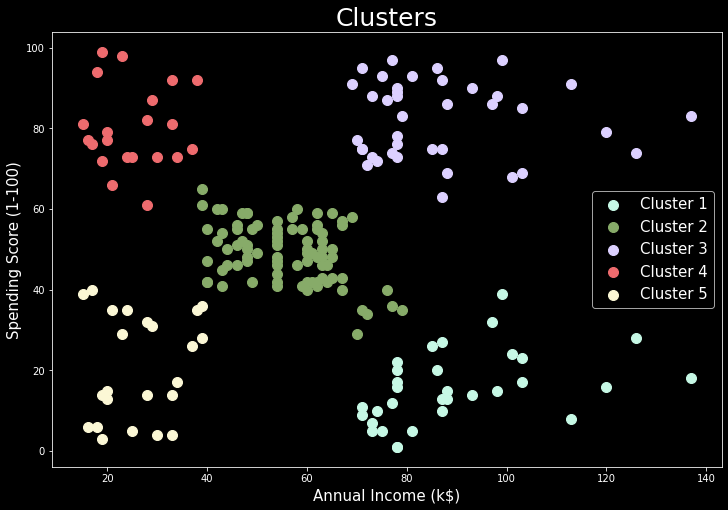
